In [1]:
import pandas as pd
import matplotlib
import geopandas
from matplotlib import pyplot as plt
import math 
from math import sin, cos, asin, sqrt, pi
import dateutil

In [3]:
df = pd.read_csv("../data/cumulative_distribution_frequency.csv")

In [4]:
max_week = df.week.max()
max_week

1205.0

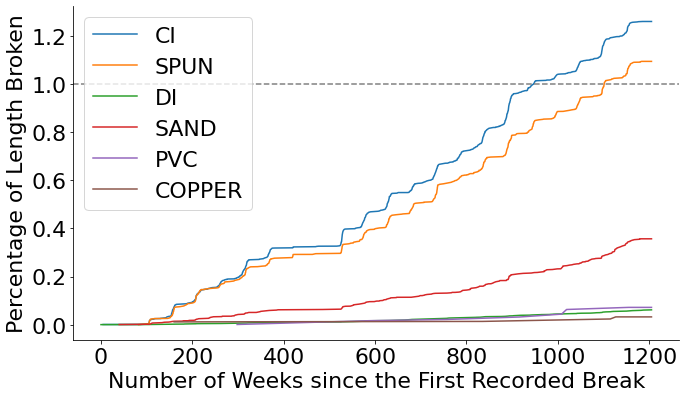

In [7]:
matplotlib.rcParams.update({"font.size":22})
fig,ax = plt.subplots(figsize = (10,6))
material = ["CI","SPUN","DI","SAND","PVC","COPPER"]
for m in material:
    temp = df[df["Material"]==m][:-1]
    row = temp.tail(1)
    temp = temp.append(row,ignore_index = True)
    temp.loc[temp.index.max(),"week"]=max_week
    temp.plot.line(x = "week",y="cum_p",ax=ax,label = m)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel("Number of Weeks since the First Recorded Break")
ax.set_ylabel("Percentage of Length Broken")
plt.tight_layout()
ax.axhline(y = 1,linestyle = "--",color = "gray")
plt.savefig("Broken Length Per Week CDF.pdf",bbox_inches = "tight")
None

In [ ]:
df = pd.read_csv("len_per_week.csv")

In [3]:
df.sort_values(by = "len_per_week",ascending = False,inplace = True,ignore_index = True)

In [4]:
df

,Material,len_per_week
0,CI,916.154417
1,SPUN,406.665289
2,DI,153.661678
3,SAND,124.416666
4,PVC,10.715338
5,COPPER,3.001686


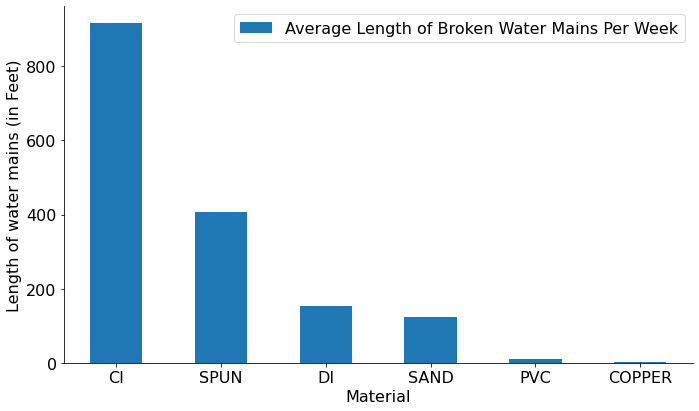

In [6]:
fig,ax = plt.subplots(figsize = (10,6))
df.plot.bar(x= "Material",y = "len_per_week",ax=ax)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(rotation = 0)
ax.set_ylabel("Length of water mains (in Feet)")
ax.legend(["Average Length of Broken Water Mains Per Week"])
plt.tight_layout()
#plt.savefig("Average Length of Broken Water Mains Per Week.pdf")

In [7]:
df = pd.read_csv("len_per_week.csv")

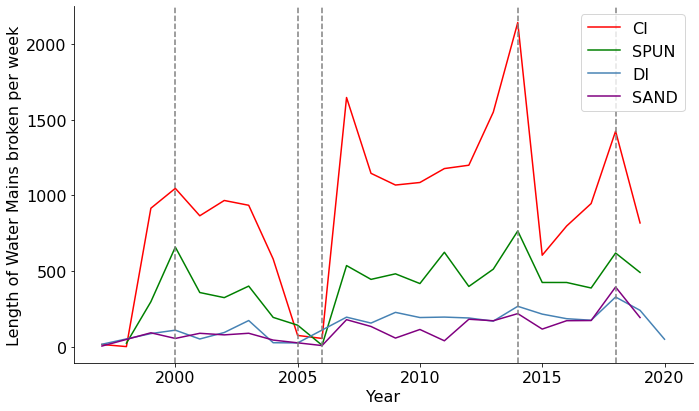

In [13]:
colors = ["red","green","steelblue","purple"]
def plot_season(material,ax):
    temp = df[df["Material"]==material]
    ax = temp.plot.line(x="break_year",y="len_per_week",label = material, color = colors.pop(0), ax=ax)
    return ax

fig,ax = plt.subplots(figsize = (10,6))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for name in ["CI","SPUN","DI","SAND"]:
    ax = plot_season(name,ax)
ax.set_xlabel("Year")
ax.set_ylabel("Length of Water Mains broken per week")
ax.axvline(x=2006,linestyle = "--",color = "gray")
ax.axvline(x=2005,linestyle = "--",color = "gray")
ax.axvline(x=2014,linestyle = "--",color = "gray")
ax.axvline(x=2018,linestyle = "--",color = "gray")
ax.axvline(x=2000,linestyle = "--",color = "gray")
plt.tight_layout()
#plt.savefig("ave broken len per week.pdf")

In [9]:
weather = pd.read_csv("data/breaks and tmin.csv")

In [10]:
weather = weather[weather["break_year"]>=1997]

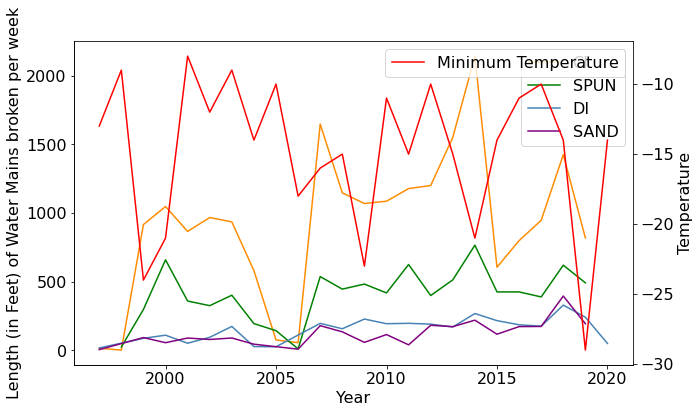

In [35]:
colors = ["darkorange","green","steelblue","purple"]
def plot_season(material,ax):
    temp = df[df["Material"]==material]
    ax = temp.plot.line(x="break_year",y="len_per_week",label = material, color = colors.pop(0), ax=ax)
    return ax

fig,ax = plt.subplots(figsize = (10,6))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for name in ["CI","SPUN","DI","SAND"]:
    ax = plot_season(name,ax)
ax2 = ax.twinx()
weather.plot(x = "break_year",y="min",label = "Minimum Temperature",color = "red",ax=ax2)
ax.set_xlabel("Year")
ax.set_ylabel("Length (in Feet) of Water Mains broken per week")
ax2.set_ylabel("Temperature")
ax2.legend(loc = "upper right")
plt.tight_layout()
#plt.savefig("ave broken len per week and temperature.pdf")

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import explained_variance_score

In [58]:
class OneHot(TransformerMixin):
    def __init__(self,col):
        self.col = col
        self.oh = OneHotEncoder()
    
    def fit(self,x,y=None):
        self.oh.fit(x[[self.col]])
        return self
    
    def transform(self,x):
        ones = self.oh.transform(x[[self.col]])
        ones = pd.DataFrame(ones.toarray(),columns = self.oh.get_feature_names(),index = x.index)
        return pd.concat((x.drop(columns = [self.col]),ones),axis = 1)

In [59]:
train,test = train_test_split(df,stratify = df["Material"],train_size = 0.75)

In [60]:
train

,Material,break_year,total_broken_len_ft,week,len_per_week
50,PVC,2011,237.631117,52.142857,4.557309
22,CI,2019,42676.646861,52.142857,818.456241
55,SAND,1999,4823.798061,52.142857,92.511196
49,PVC,2008,739.070079,52.285714,14.135220
69,SAND,2014,11433.922278,52.142857,219.280701
...,...,...,...,...,...
74,SAND,2019,10076.015970,52.142857,193.238662
39,DI,2012,9957.593299,52.285714,190.445773
61,SAND,2006,424.427796,52.142857,8.139711
58,SAND,2002,4109.184209,52.142857,78.806273


In [61]:
oh = OneHot("Material")
data = oh.fit_transform(train[["break_year","Material"]])

In [62]:
data

,break_year,x0_CI,x0_COPPER,x0_DI,x0_PVC,x0_SAND,x0_SPUN
50,2011,0.0,0.0,0.0,1.0,0.0,0.0
22,2019,1.0,0.0,0.0,0.0,0.0,0.0
55,1999,0.0,0.0,0.0,0.0,1.0,0.0
49,2008,0.0,0.0,0.0,1.0,0.0,0.0
69,2014,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
74,2019,0.0,0.0,0.0,0.0,1.0,0.0
39,2012,0.0,0.0,1.0,0.0,0.0,0.0
61,2006,0.0,0.0,0.0,0.0,1.0,0.0
58,2002,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
p = Pipeline([
    ("onehot",OneHot("Material")),
    ("poly",PolynomialFeatures(2)),
    ("lr",LinearRegression())
])
p.fit(train[["break_year","Material"]],train["len_per_week"])
(explained_variance_score(train["len_per_week"],p.predict(train[["break_year","Material"]])),
explained_variance_score(test["len_per_week"],p.predict(test[["break_year","Material"]])))

(0.7204214422101993, 0.6206956765694671)

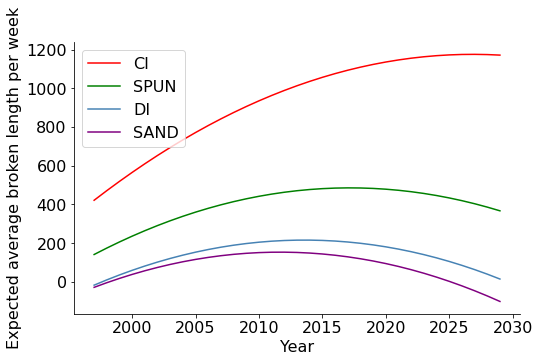

In [67]:
colors = ["red","green","steelblue","purple"]
def plot_season(material,ax):
    df = pd.DataFrame({
        "Material":material,
        "break_year": np.arange(1997,2030,1),
    })
    df["predicted_len"] = p.predict(df)
    ax = df.plot.line(x="break_year",y="predicted_len",label = material, color = colors.pop(0), ax=ax)
    return ax

fig,ax = plt.subplots(figsize = (8,5))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for name in ["CI","SPUN","DI","SAND"]:
    ax = plot_season(name,ax)
ax.set_xlabel("Year")
ax.set_ylabel("Expected average broken length per week")
#plt.savefig("break prediction ave broken len.pdf")